# Présentation de la recherche 

## Benchmarking et Analyse Expérimentale des Algorithmes et Modèles de l'IA

# PREMIERE ETAPE 

### ALGORITHME CMAES 

L'algorithme que nous avons choisi dans cette étape est ***CMA-ES (Covariance Matrix Adaptation Evolution Strategy).***

##### Qu'est ce que CMAES ?

CMA-ES est un algorithme d'optimisation évolutif basé sur une stratégie d'évolution. Il est particulièrement efficace pour résoudre des problèmes d'optimisation non linéaires, continus et sans gradient.
Il fonctionne comme suit : 
- Initialisation :
        L'algorithme commence avec une population initiale d'individus générés aléatoirement.
        Une distribution gaussienne est utilisée pour définir les solutions candidates.
- Évaluation et sélection :
        Chaque individu est évalué en fonction de la fonction objectif.
        Les meilleurs individus sont sélectionnés pour guider l'évolution.
- Adaptation de la covariance :
        Contrairement aux algorithmes évolutionnaires classiques, CMA-ES ajuste dynamiquement la matrice de covariance.
        Cela permet d'adapter la direction et l'amplitude des mutations en fonction de la topologie du paysage de la fonction.
- Nouvelle génération :
    De nouvelles solutions sont échantillonnées à partir de la distribution mise à jour.
    Le processus est répété jusqu'à convergence ou un critère d'arrêt prédéfini.

#### 5. Visualisation des résultats de l'exécutetion de CMA-ES sur un ensemble de données.

Le CMA-ES (Covariance Matrix Adaptation Evolution Strategy) est un algorithme d’optimisation stochastique, on remarque que chaque exécution (ou run) est différente à cause des éléments suivants :

- Initialisation aléatoire:
    CMA-ES commence avec une population initiale qui est choisie aléatoirement dans l’espace de recherche.
    Donc, chaque exécution part d’un point de départ différent, ce qui affecte le trajet de convergence.
- Mutation et recombinaison:
    Les individus (solutions candidates) sont générés avec des perturbations aléatoires.
    À chaque génération, de nouveaux candidats sont échantillonnés à partir d’une distribution gaussienne qui évolue au fil du temps.
    Cela signifie que même si on optimise la même fonction, les valeurs précises à chaque étape changent.
- Sélection et mise à jour de la distribution:

Même si les tendances globales sont similaires, les détails du chemin de convergence diffèrent d’une exécution à l’autre.

###### Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

In [1]:
import matplotlib.pyplot as plt
import math


# with open("bbobexp_f1_DIM2.tdat", "r") as f:

def affichage_par_instances(fichier):
# Ouvrir le fichier .tdat
    with open(fichier, "r") as f:
        lignes = f.readlines()
    # Initialisation des listes pour stocker toutes les exécutions
    executions = []
    x, y = [], []
    debut = False

    # Lecture des lignes du fichier
    for ligne in lignes:
        ligne = ligne.strip()

        if ligne.startswith('% function evaluation | noise-free fitness'):
            debut = True  # Début de l'exécution
            if x and y:
                executions.append((x, y))
                x, y = [], []  # Réinitialisation des listes

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x.append(int(valeurs[0]))  # Ordre des évaluations
            y.append(float(valeurs[2]))  # Meilleure différence

    # Ajouter la dernière exécution si elle n'a pas été ajoutée
    if x and y:
        executions.append((x, y))

    # Détermination des dimensions de la grille
    n = len(executions)
    cols = math.ceil(math.sqrt(n))  # Nombre de colonnes (optimisé)
    rows = math.ceil(n / cols)  # Nombre de lignes

    # Création de la figure et des sous-graphiques
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Transformation en liste pour accès facile

    # Génération des graphiques
    for i, (x, y) in enumerate(executions):
        axes[i].plot(x, y, linestyle="-", marker="o", color="b")
        axes[i].set_xlabel("Ordre des évaluations", color="b")
        axes[i].set_ylabel("Différence optimale", color="b")
        axes[i].set_title(f"Exécution {i+1}")
        axes[i].grid()

    # Suppression des sous-graphiques vides (si le nombre d'exécutions < nb total de subplots)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustement de l'espacement
    fig.tight_layout()
    plt.show()
    
    

affichage_par_instances("bbobexp_f1_DIM2.tdat")

ModuleNotFoundError: No module named 'matplotlib'

###### Affichage de toutes les exécutions du fichier f1 de dimension 1 dans la même figure

On définit une fonction qui fait l'affichage des exécutions du fichier passé en paramétre

In [ ]:
import matplotlib.pyplot as plt

def Affichage_fn(fichier):

    # Définition des couleurs (au cas où il y aurait plus de runs)
    couleurs = [
        "b", "g", "r", "c", "m", "y", "k", "orange", "purple", "brown",
        "pink", "lime", "teal", "navy", "gold"
    ]

    plt.figure(figsize=(10, 6))  # Une seule figure

    # Parcourir chaque fichier et récupérer les deux premiers runs
    couleur_index = 0  # Suivi des couleurs utilisées

    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x, y = [], []
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x and y:
                runs.append((x, y))  # Ajouter le run à la liste
            debut = True  # Début d'une nouvelle exécution
            x, y = [], []  # Réinitialisation des listes

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x.append(int(valeurs[0]))  # Ordre des évaluations
            y.append(float(valeurs[2]))  # Meilleure différence

    # Ajouter le dernier run s'il n'a pas été ajouté
    if x and y and len(runs) < 15:
        runs.append((x, y))

    # Affichage des runs sur la même figure
    for j, (x_vals, y_vals) in enumerate(runs):
        plt.plot(
            x_vals, y_vals, linestyle="-", marker="o",
            color=couleurs[couleur_index % len(couleurs)], 
            label=f"Run {j+1}"
        )
        couleur_index += 1  # Passer à la couleur suivante

    # Ajout des labels et titre
    plt.xlabel("Ordre des évaluations")
    plt.ylabel("Différence fonction sans bruit - optimale")
    plt.title("Affichage de toutes les exécutions du fichier f1")
    plt.legend()  # Affichage de la légende
    plt.grid(True)

    plt.show()


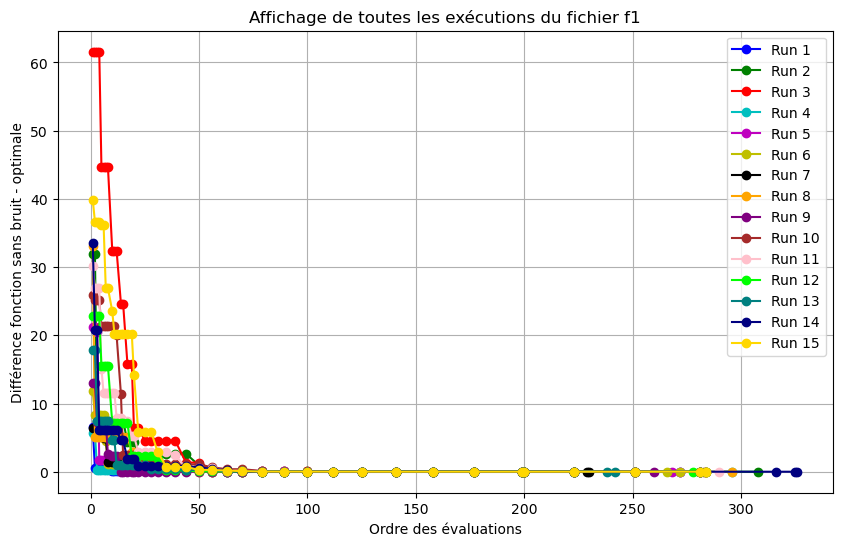

In [ ]:
Affichage_fn("bbobexp_f1_DIM2.tdat")

Chaque fichier correspond à une fonction d’optimisation différente.Certaines fonctions ont un gradient clair et convergent rapidement , d'autres sont plus rugueuses avec des pièges locaux, rendant l’optimisation plus difficile.

###### Affichage de toutes les exécutions du fichier f2 de dimension 2 

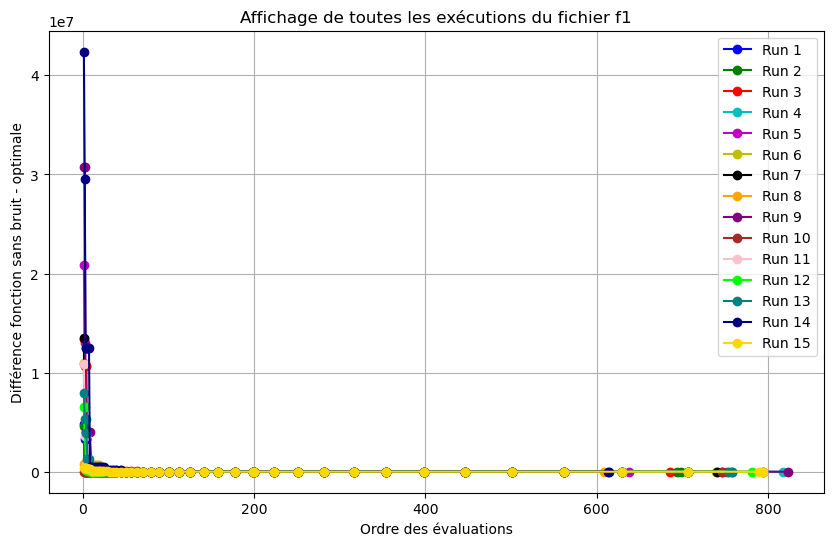

In [ ]:
Affichage_fn("bbobexp_f2_DIM2.tdat")

#### 6. Choix d'une agrégation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def Agrégation_fn(fichier, ax):
    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x_vals_all, y_vals_all = [], []  
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x_vals_all and y_vals_all:
                runs.append((x_vals_all, y_vals_all))  
            debut = True  
            x_vals_all, y_vals_all = [], []  

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x_vals_all.append(int(valeurs[0]))  
            y_vals_all.append(float(valeurs[2]))  

    if x_vals_all and y_vals_all:
        runs.append((x_vals_all, y_vals_all))

    # Trouver la longueur minimale des runs pour aligner les données
    min_len = min(len(run[0]) for run in runs)
    x_common = runs[0][0][:min_len]  # On prend les x du premier run tronqués

    y_matrix = np.array([run[1][:min_len] for run in runs])  # Matrice des y

    # Calcul des statistiques descriptives
    y_mean = np.mean(y_matrix, axis=0)  # Moyenne
    y_std = np.std(y_matrix, axis=0)  # Écart-type

    # Affichage de la courbe moyenne avec une enveloppe
    ax.plot(x_common, y_mean, color="black", label="Moyenne des runs")
    ax.fill_between(x_common, y_mean - y_std, y_mean + y_std, color="r", alpha=0.2, label="Écart-type")

    ax.set_xscale("log")  # Échelle logarithmique sur l'axe X
    ax.set_xlabel("Ordre des évaluations (échelle log)")
    ax.set_ylabel("Différence fonction sans bruit - optimale")

    # Extraire uniquement le nom du fichier sans le chemin
    nom_fichier = os.path.basename(fichier)
    ax.set_title(f"Agrégation des runs - {nom_fichier}")

    ax.legend()
    ax.grid(True)


fonction d'affichage

In [ ]:
def affichage_par_agregation(fichiers,rows,cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

    # Convertir en tableau 1D pour un accès plus facile
    axes = np.array(axes).flatten()

    # Afficher les fichiers
    for i, fichier in enumerate(fichiers):
        Agrégation_fn(fichier, axes[i])

    # Supprimer les axes vides si le nombre de fichiers < nb total de cases
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

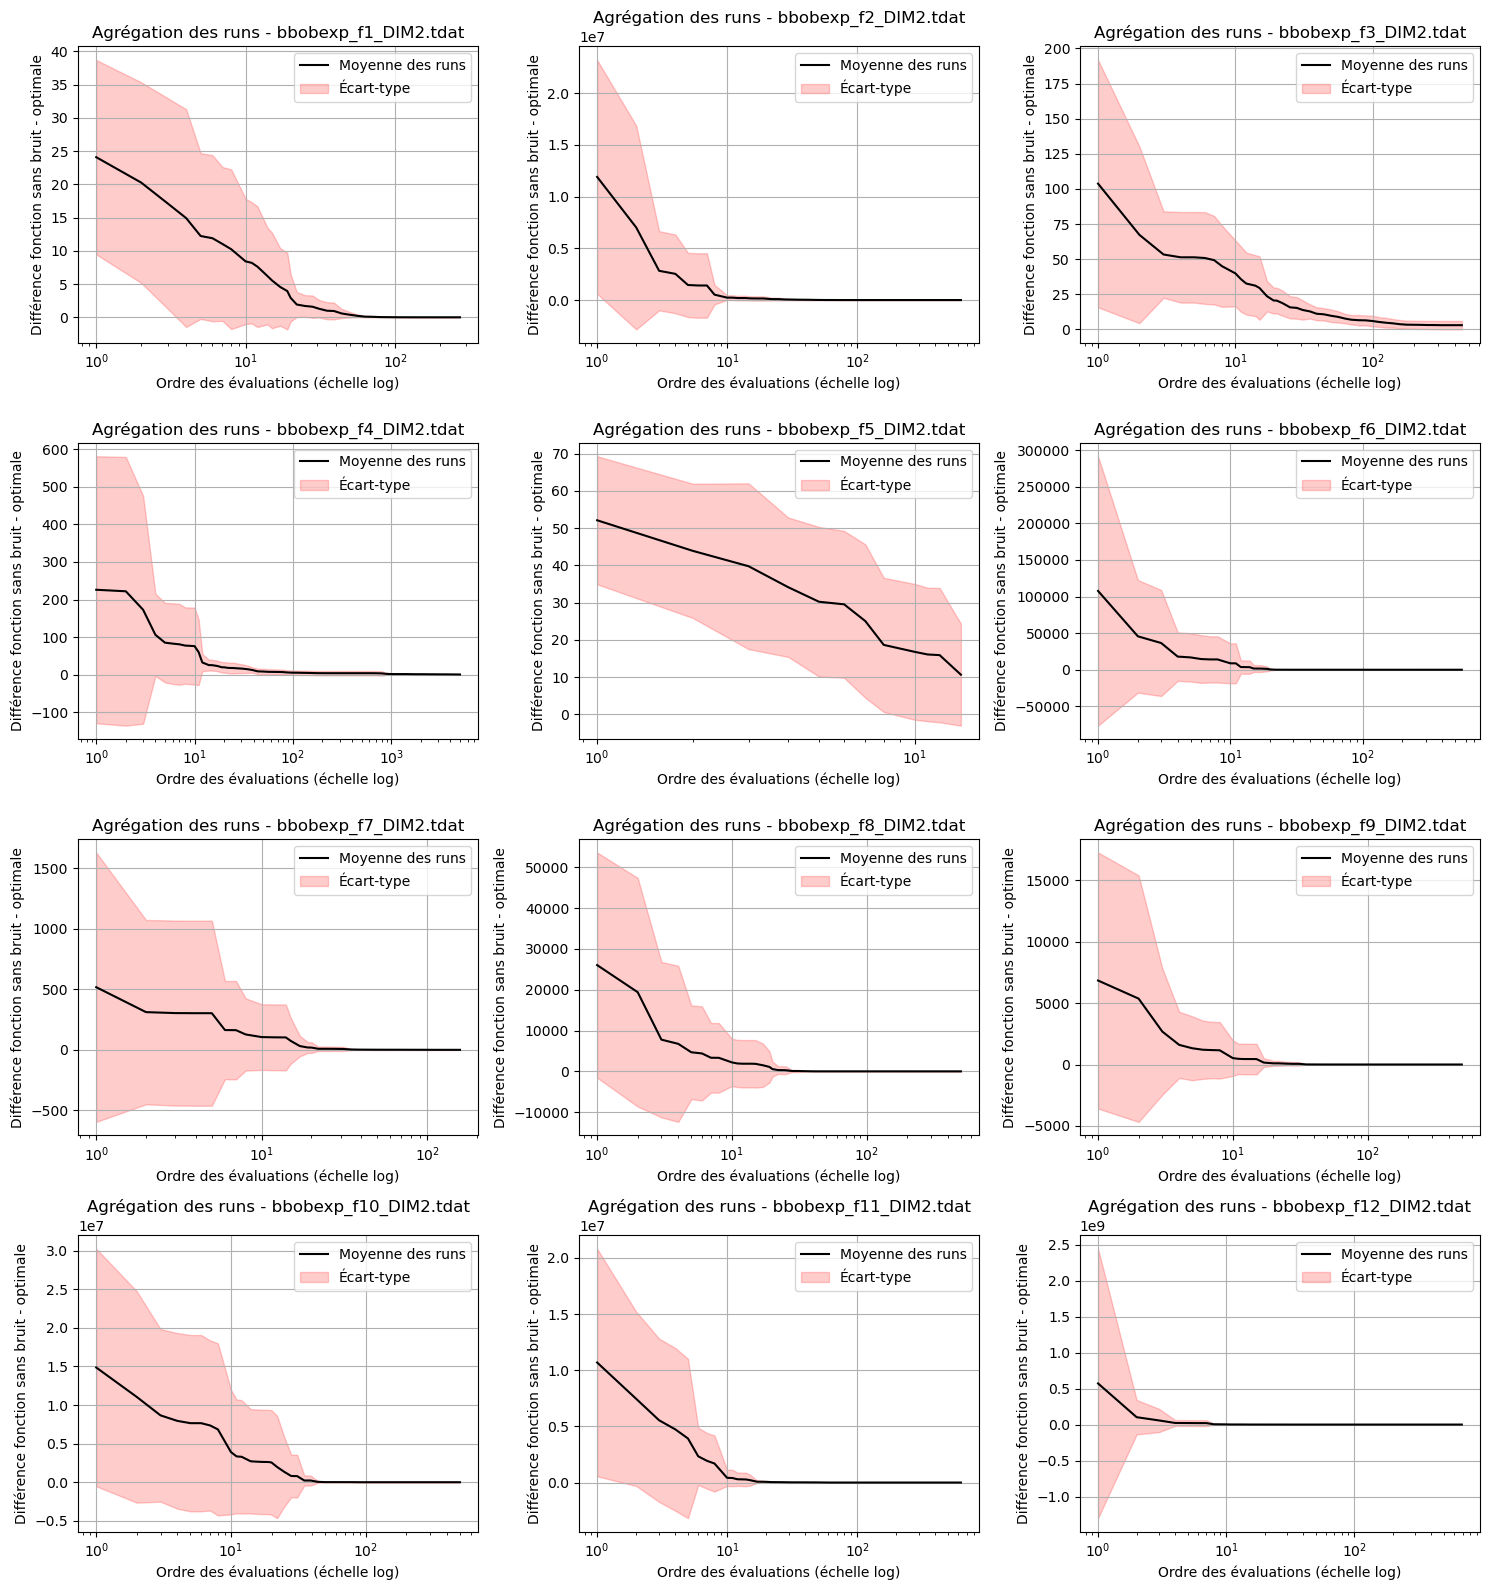

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "bbobexp_f1_DIM2.tdat",
    "bbobexp_f2_DIM2.tdat",
    "bbobexp_f3_DIM2.tdat",
    "bbobexp_f4_DIM2.tdat",
    "bbobexp_f5_DIM2.tdat",
    "bbobexp_f6_DIM2.tdat",
    "bbobexp_f7_DIM2.tdat",
    "bbobexp_f8_DIM2.tdat",
    "bbobexp_f9_DIM2.tdat",
    "bbobexp_f10_DIM2.tdat",
    "bbobexp_f11_DIM2.tdat",
    "bbobexp_f12_DIM2.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

# DEUXIEME ETAPE 

###### Performance en fonction du type de la fonction

On a 5 types de fonctions on prendra une de chacun des types et on variera la dimension pour voir comment la performance de l'algorithme différe.
- Type : Seprable : f1-f5
- Type : Low or moderate conditionning : f6 - f9
- Type : High conditionning and unimodal : f10 - f14 
- Type : Multi-modal with adequate global structure : f15-f19
- Type : Mutli-modal with weak global structure : f20 - f24 

###### Type 1 : Fonction separable : f5 

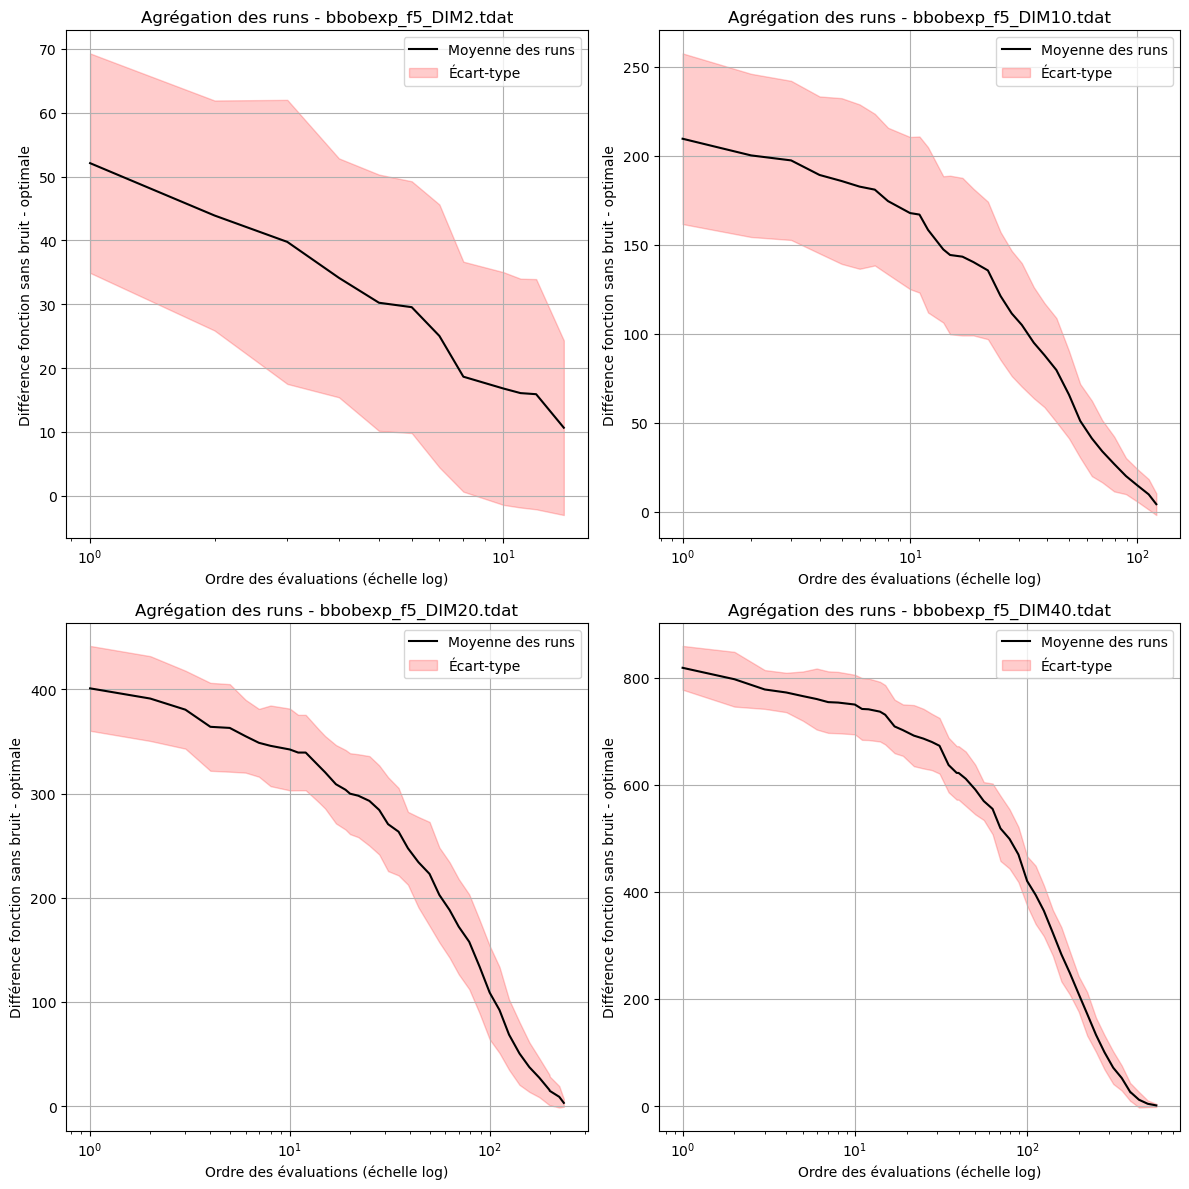

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "data_f5/bbobexp_f5_DIM2.tdat",
    "data_f5/bbobexp_f5_DIM10.tdat",
    "data_f5/bbobexp_f5_DIM20.tdat",
    "data_f5/bbobexp_f5_DIM40.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))

# Convertir en tableau 1D pour un accès plus facile
axes = np.array(axes).flatten()

# Afficher les fichiers
for i, fichier in enumerate(fichiers):
    Agrégation_fn(fichier, axes[i])

# Supprimer les axes vides si le nombre de fichiers < nb total de cases
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

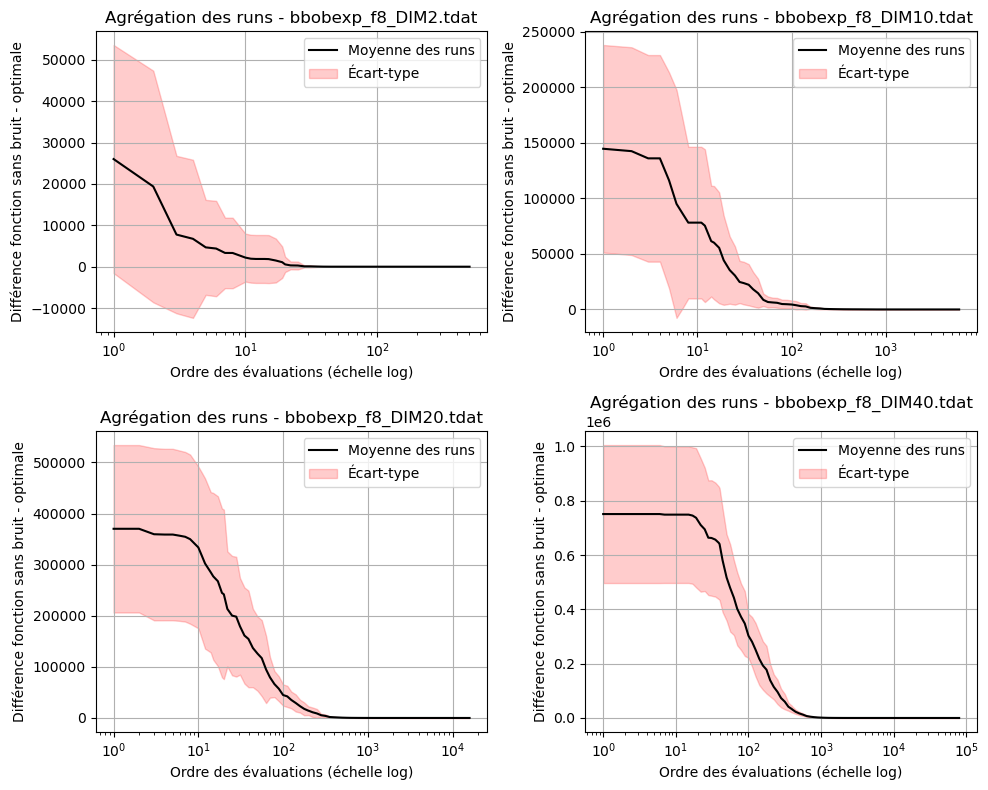

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f8\bbobexp_f8_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

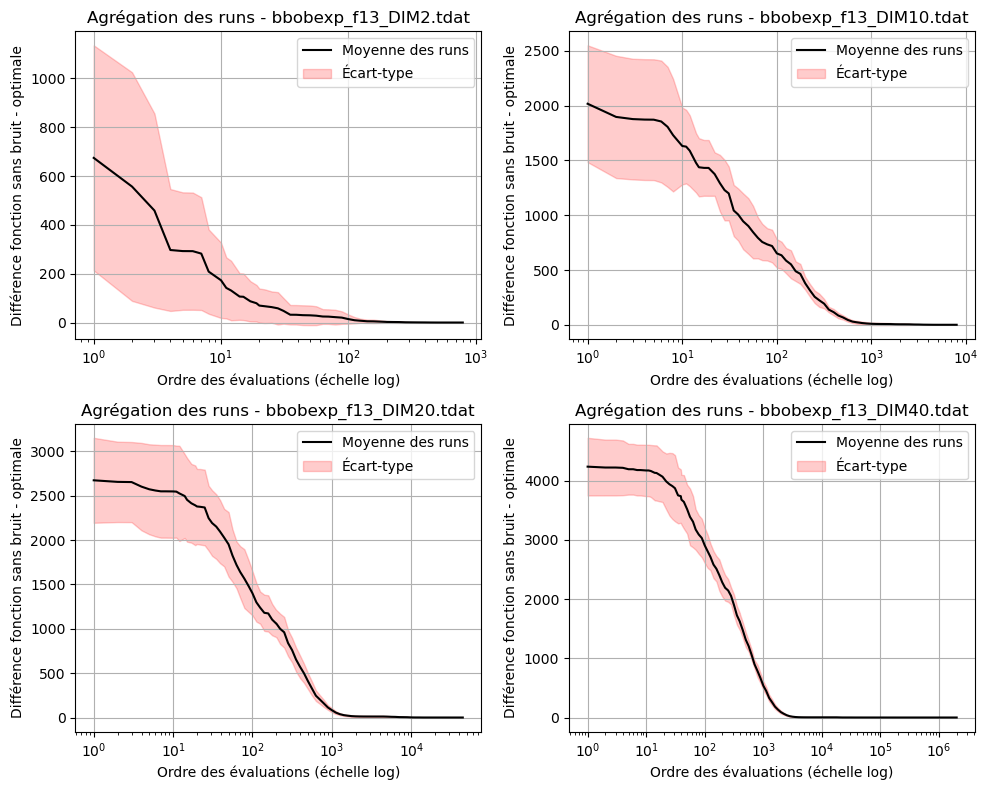

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f13\bbobexp_f13_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 4 : Multi-modal with adequate global structure : f15 : Rastrigin 

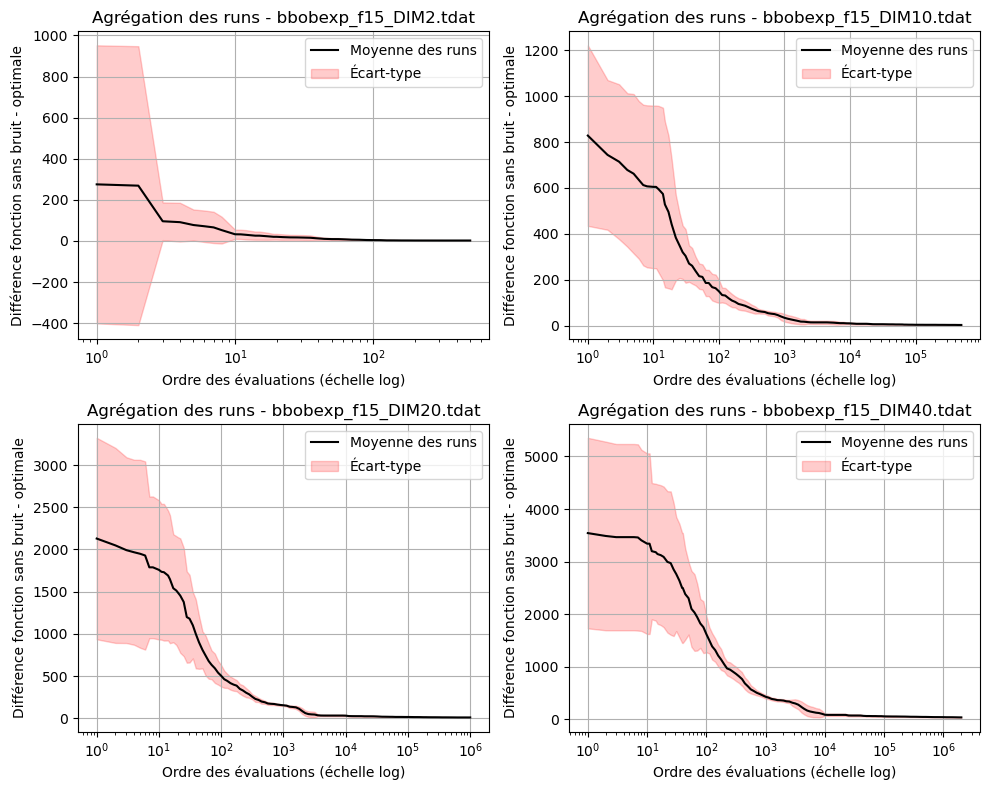

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM10.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM20.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f15\bbobexp_f15_DIM40.tdat",
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

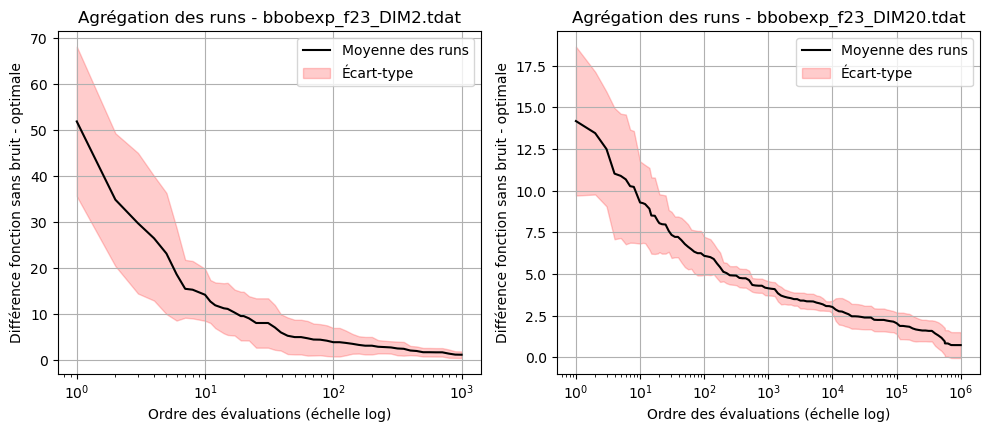

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f23\bbobexp_f23_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\CMAES\data_f23\bbobexp_f23_DIM20.tdat",
]

affichage_par_agregation(fichiers,2,2)


# TROIXIEME ETAPE

On choisi les deux alogrithmes suivant : 
- SOO
- randomsearch-5
et on refait les étapes d'analyse de l'étape 1 , et l'étape 2.

## ALGORITHME MLSL

######  Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

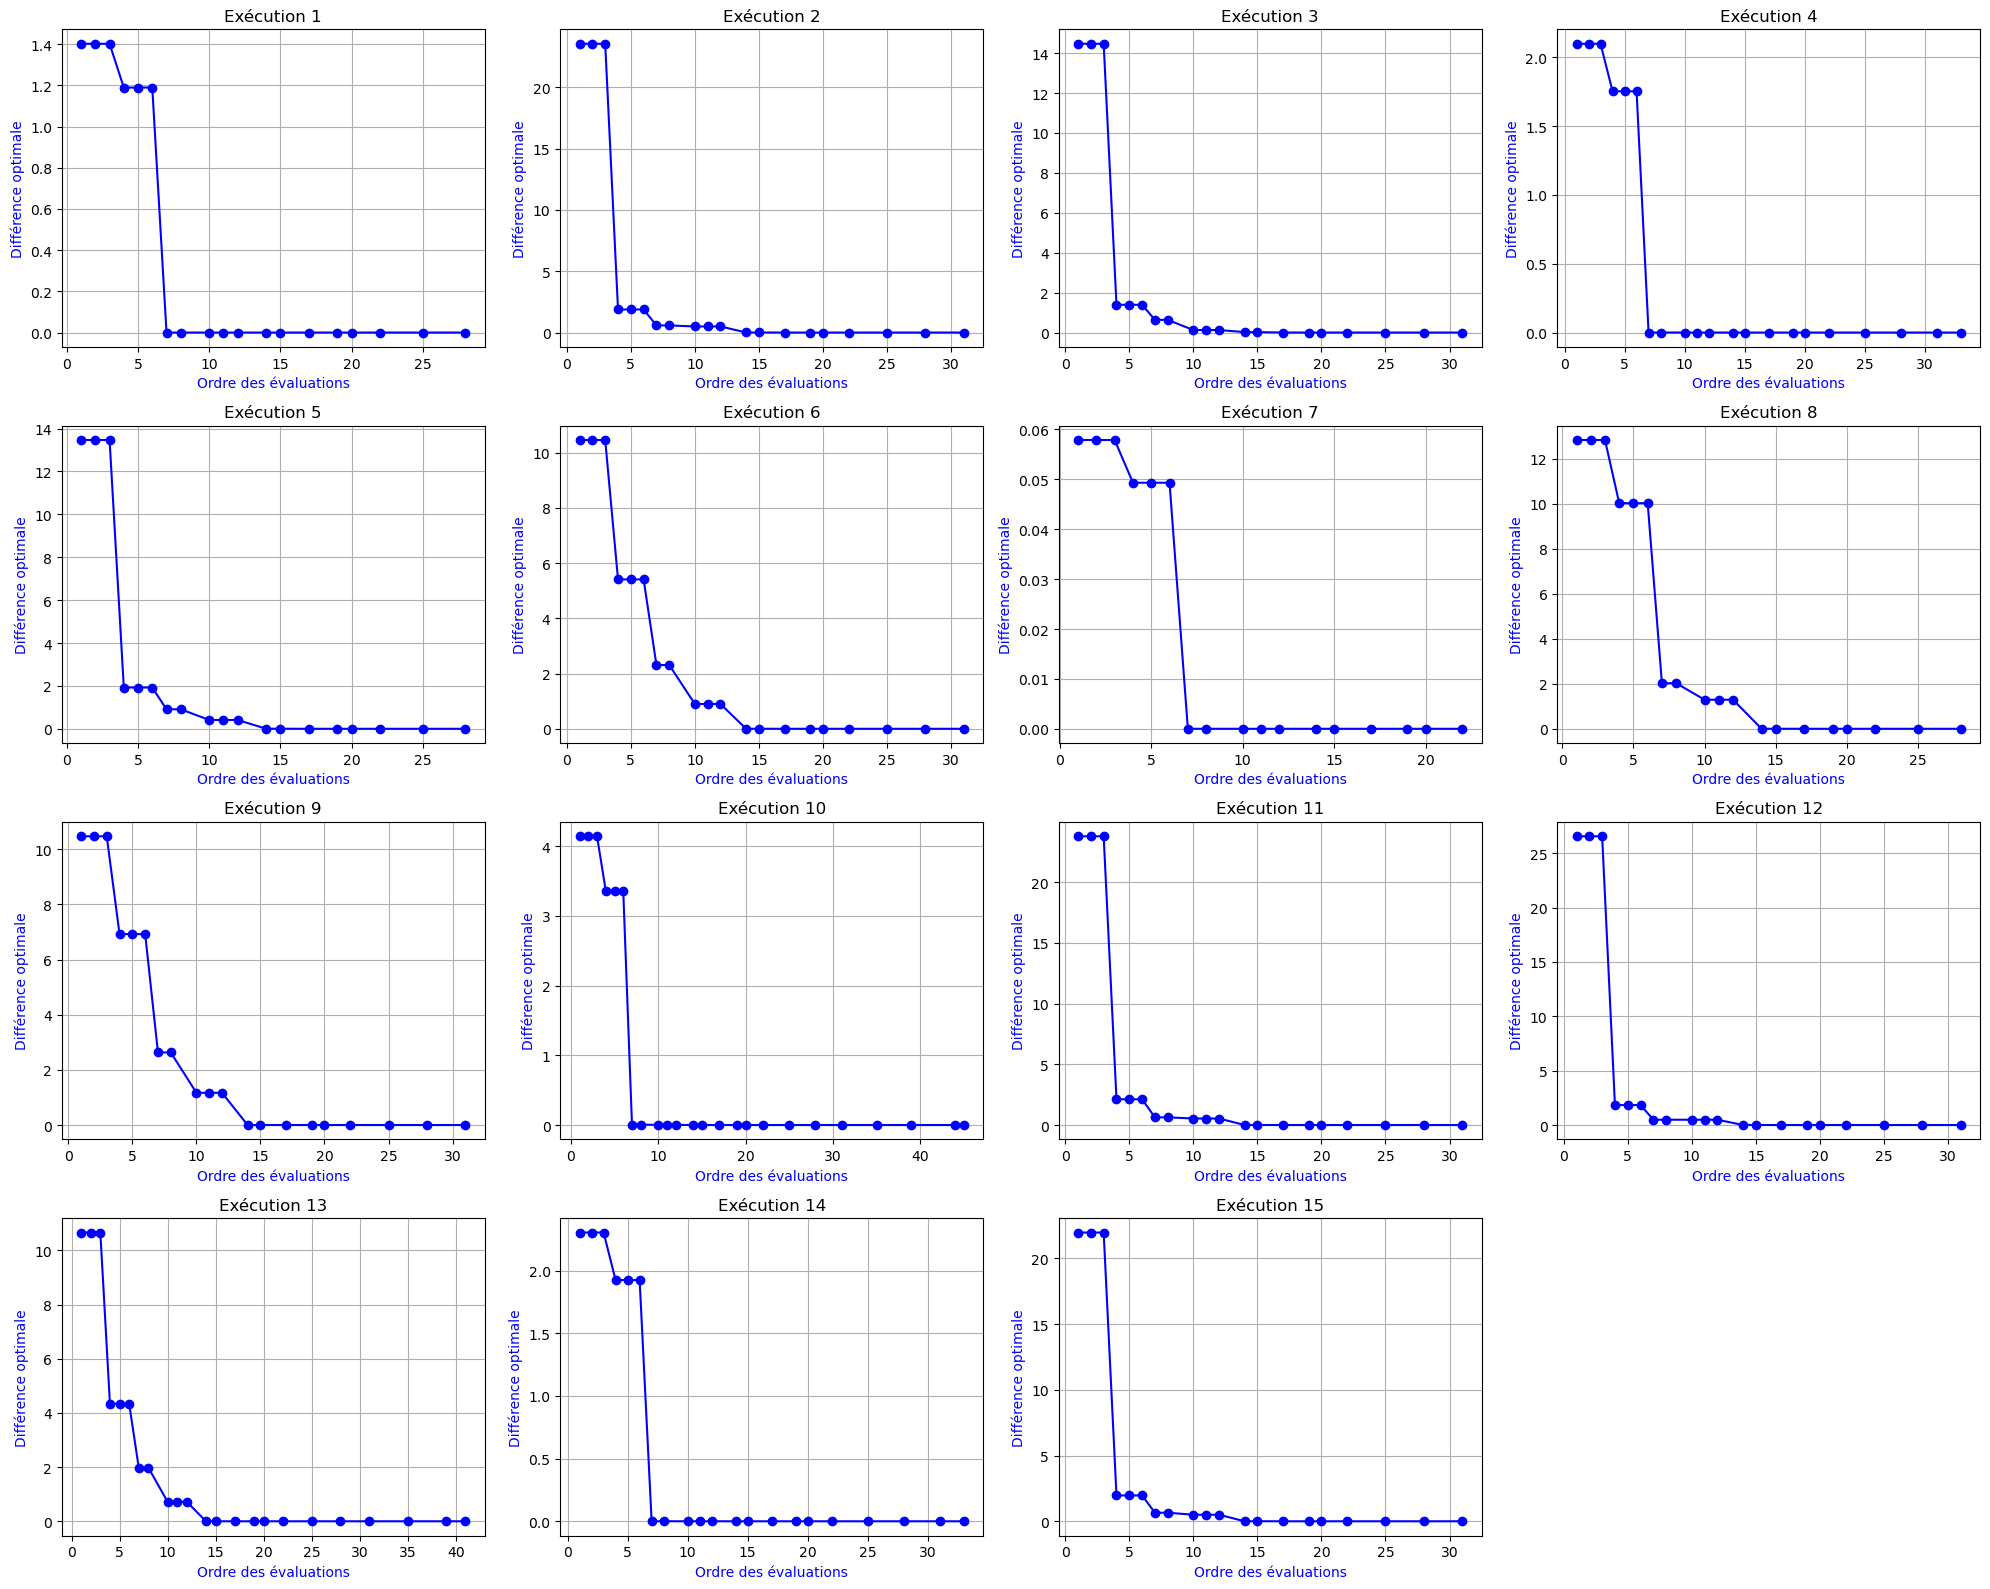

In [ ]:
affichage_par_instances(r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f1\bbobexp_f1_DIM2.tdat")

##### Performance de MLSQL en fonction du type de la fonction d'évaluation et la dimension du problème

###### Type 1 : Fonction separable : f5 

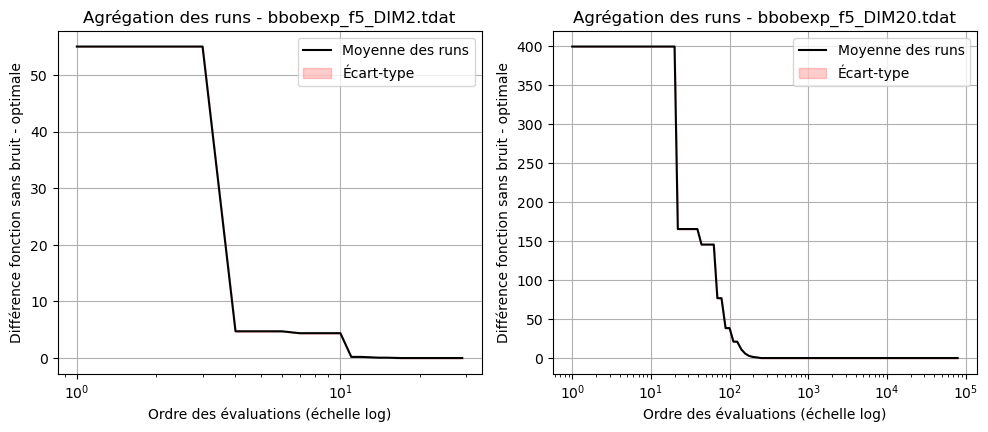

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f5\bbobexp_f5_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f5\bbobexp_f5_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

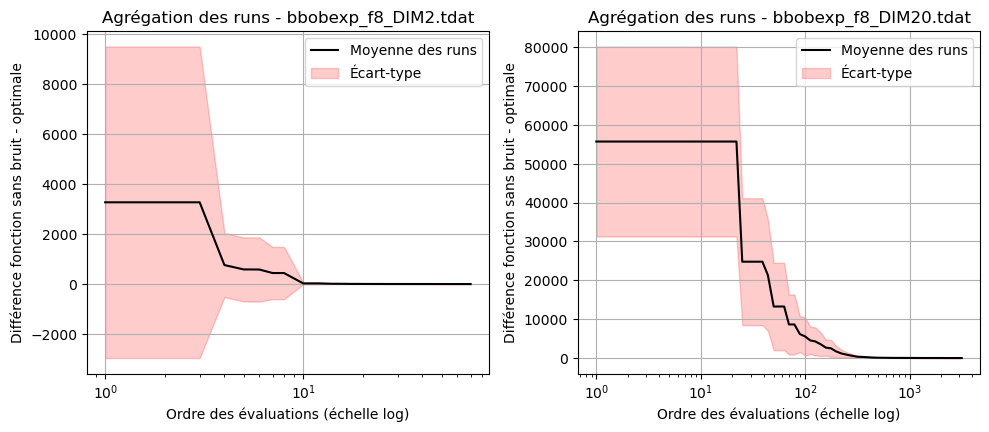

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f8\bbobexp_f8_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f8\bbobexp_f8_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

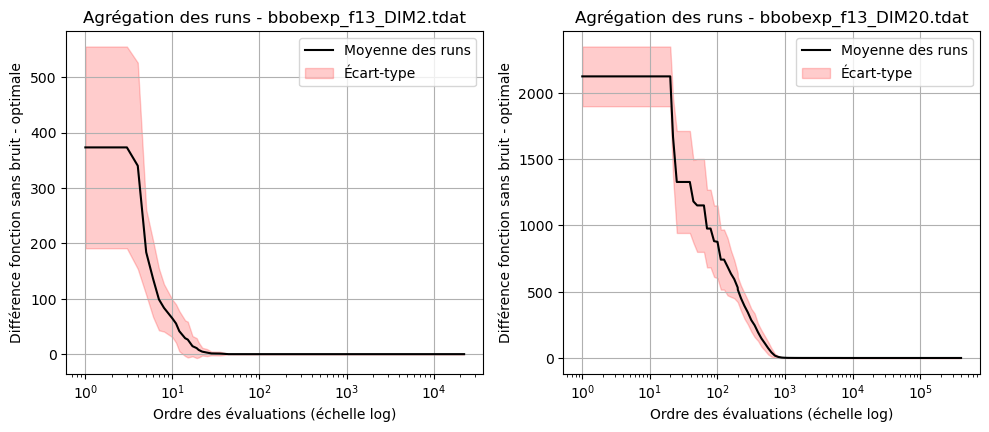

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f13\bbobexp_f13_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f13\bbobexp_f13_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 4 : Multi-modal with adequate global structure : f15 : Rastrigin 

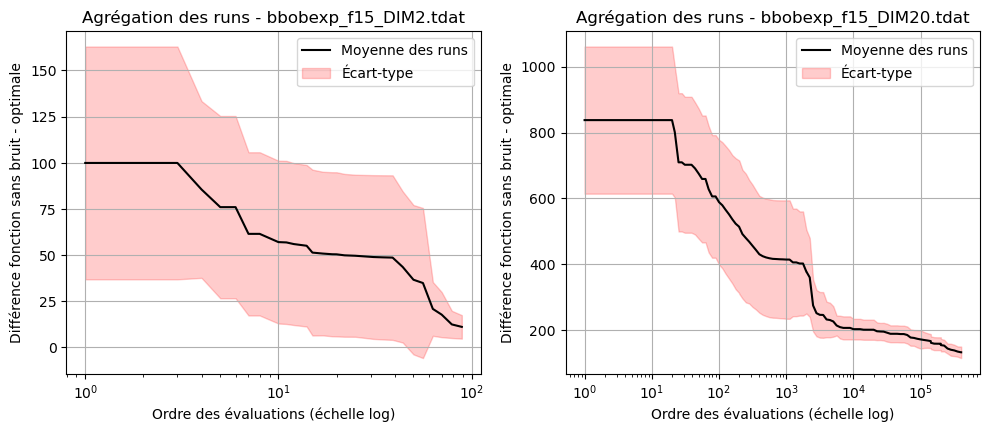

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f15\bbobexp_f15_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f15\bbobexp_f15_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

###### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

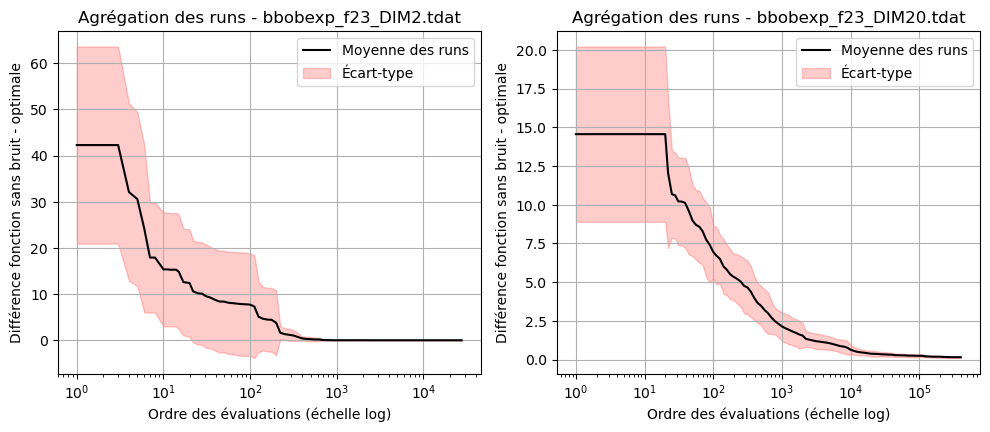

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f23\bbobexp_f23_DIM2.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\MLSL\data_f23\bbobexp_f23_DIM20.tdat"
]

affichage_par_agregation(fichiers,2,2)

## ALGORITHME RANDOMFOREST-5

######  Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

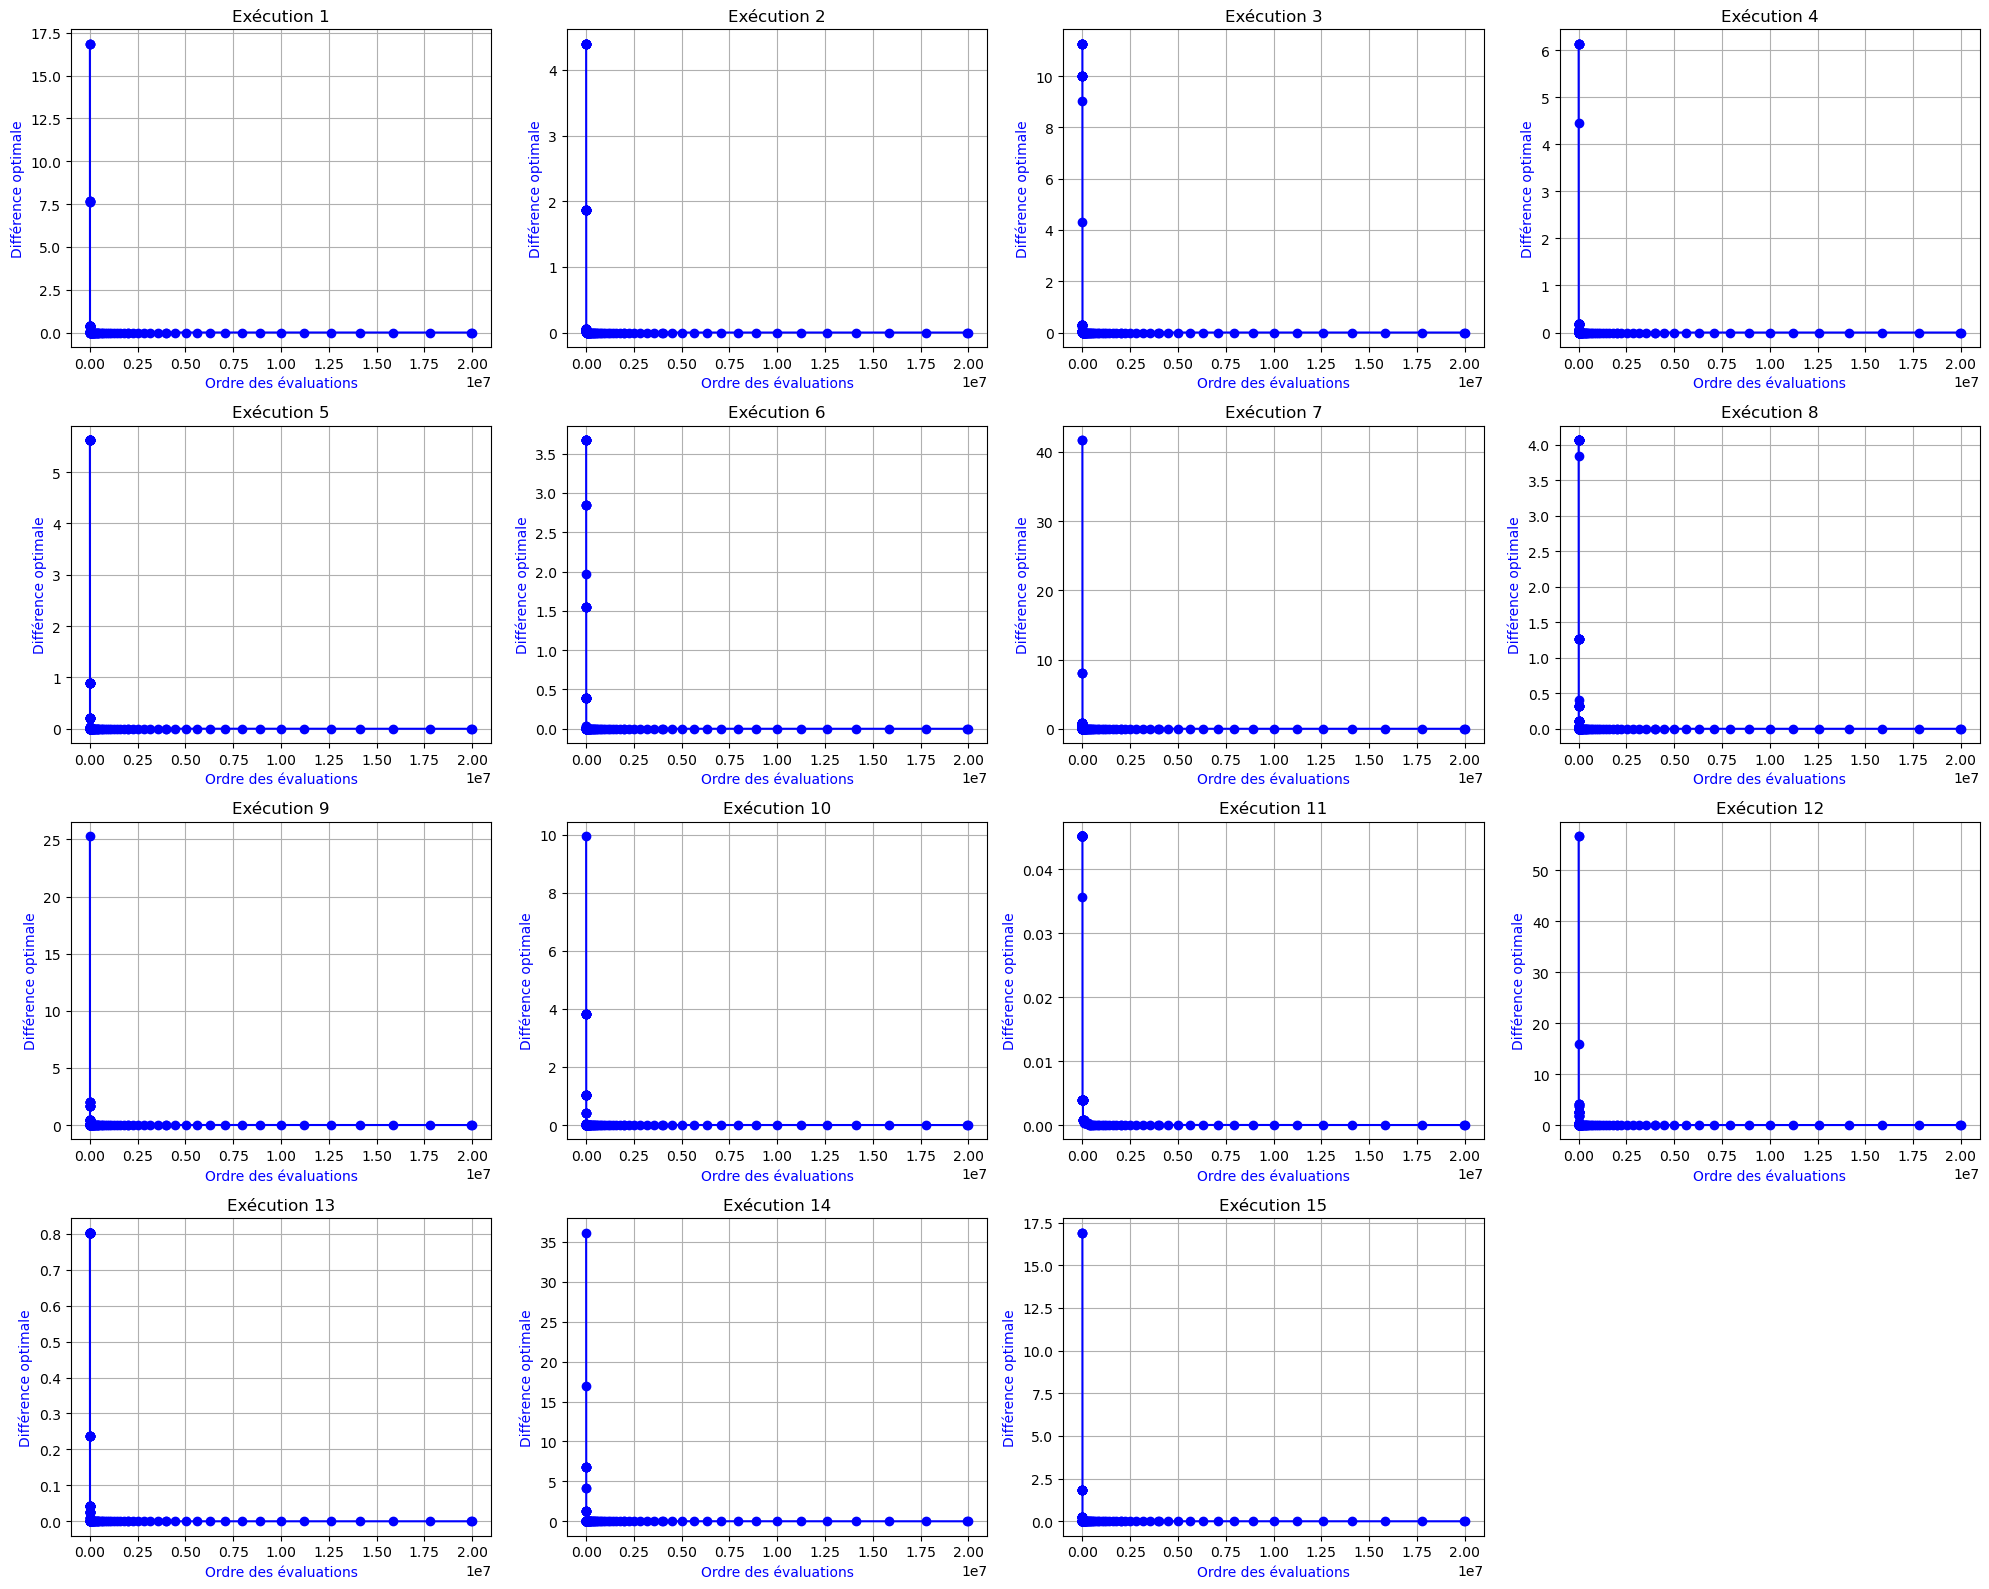

In [ ]:
affichage_par_instances(r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f1\bbobexp_f1_DIM2_i1.tdat")

###### Type 1 : Fonction separable : f5 

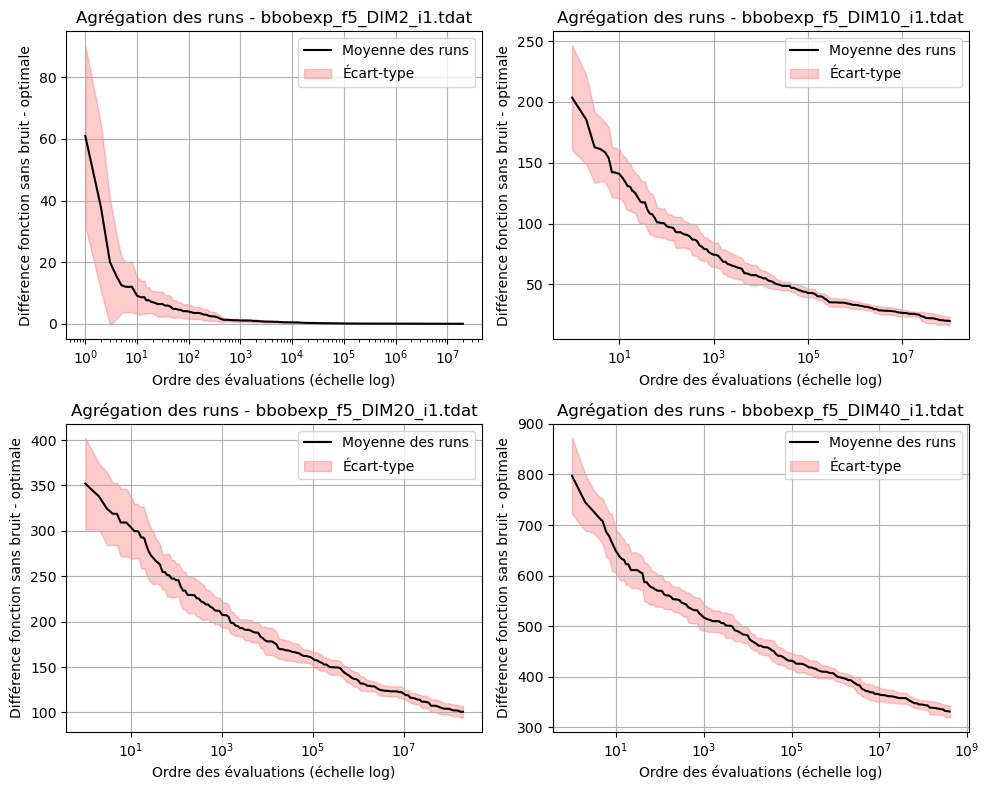

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f5\bbobexp_f5_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 2 : Fonction Low or moderate conditionning : f8 : Rosenbrock original

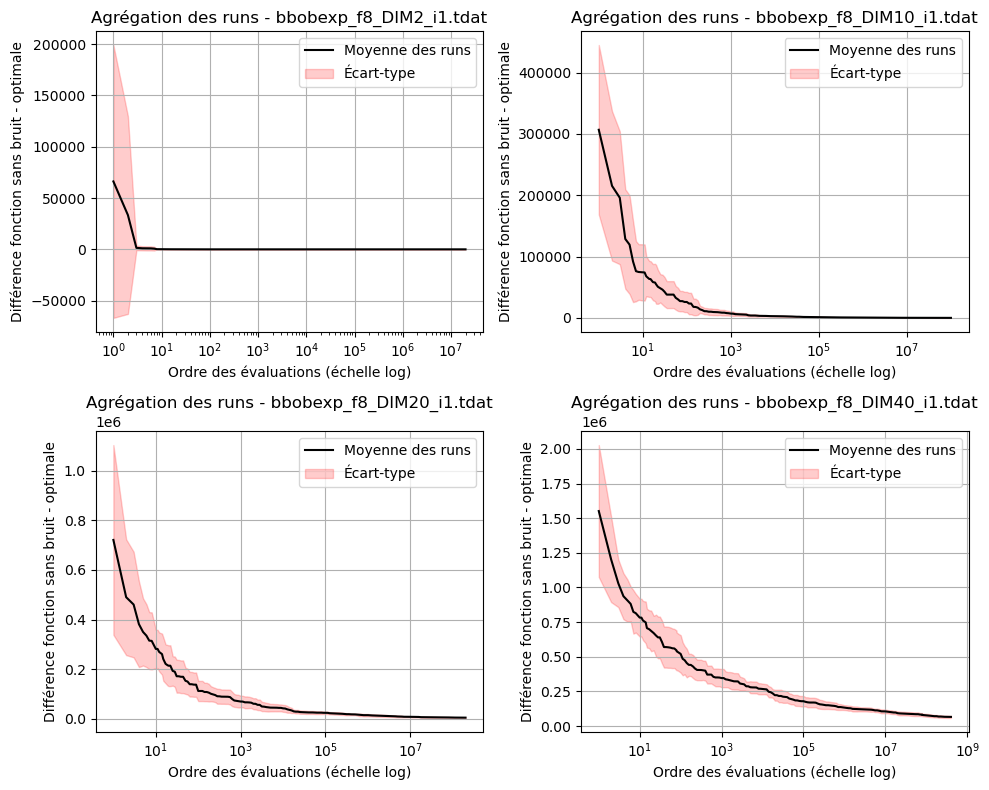

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f8\bbobexp_f8_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

### Analyse de l'agrégation des runs de la fonction RosenBrock pour la dimension 40


#### **Analyse de la performance**
- **Phase initiale (gauche du graphe, faibles évaluations)** : L’algorithme améliore rapidement la solution initiale avec une forte réduction de l’erreur.
- **Phase intermédiaire (milieu du graphe, \(10^3\) à \(10^6\) évaluations)** : La courbe continue de diminuer, mais plus lentement, ce qui suggère que l’algorithme affine sa solution.
- **Phase finale (droite du graphe, \(10^7\) évaluations et plus)** : La courbe devient presque plate, indiquant une convergence vers une valeur stable (minimum local ou global de la fonction).

#### **Comparaison avec la nature de f8**
- La fonction de Rosenbrock est connue pour être difficile à optimiser à cause de sa vallée étroite et incurvée qui mène au minimum global.
- L’algorithme Random Forest semble bien réduire l’erreur au fil des itérations, mais il pourrait être limité dans la convergence finale à cause de la difficulté de la fonction.
- L'écart-type initial élevé suggère que la performance varie selon les runs, ce qui peut être dû à l’exploration aléatoire de l’algorithme.

### Comparaison entre les agrégations des runs de la fonction RosenBrock pour les dimension 2 , 10 , 20 et 40

On remarque plus la dimension augmente plus l'algorithme devient moins performant : 
- Pour une dimension égale à 2 , il converge vers \(10^0.5\)
- Pour une dimension égale à 10 , il converge vers \(10^3\)


###### Type 3 : Fonction High conditionning : f13 : Sharp ridge 

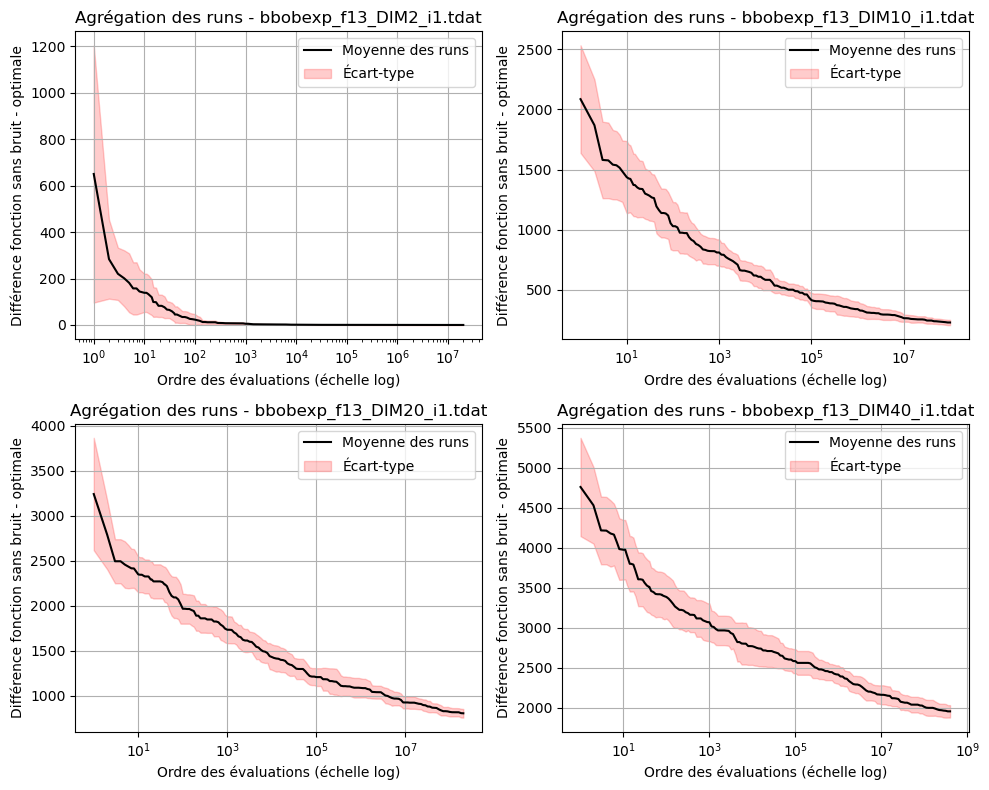

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f13\bbobexp_f13_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 4 : Multi-modal with adequate global structure : f15 : Rastrigin 

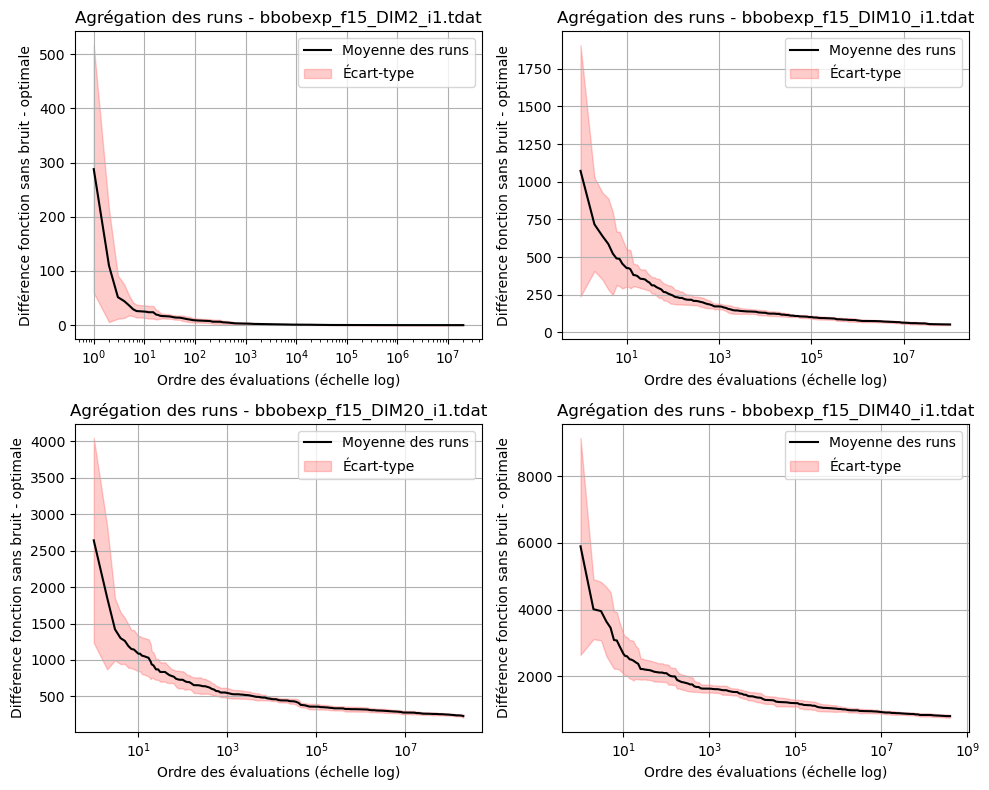

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f15\bbobexp_f15_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

###### Type 5 : Multi-modal with weak global structure : f23 : Katsuura

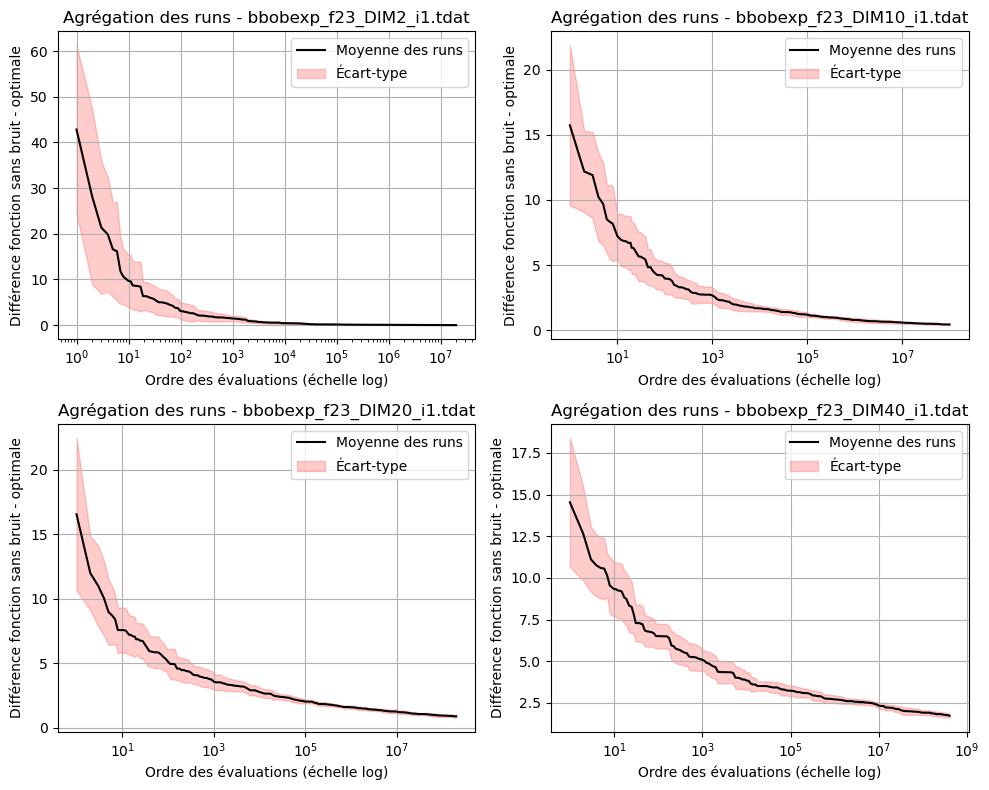

In [ ]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM2_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM10_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM20_i1.tdat",
    r"C:\Users\Hp\Desktop\Pres de la recherche\RANDOMSEARCH-5-1e7D-Brockhoff\data_f23\bbobexp_f23_DIM40_i1.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = 2  # Nombre de lignes
cols = 2  # Nombre de colonnes

affichage_par_agregation(fichiers,rows,cols)

## Comparaison entre les 3 algorithmes selon la fonction

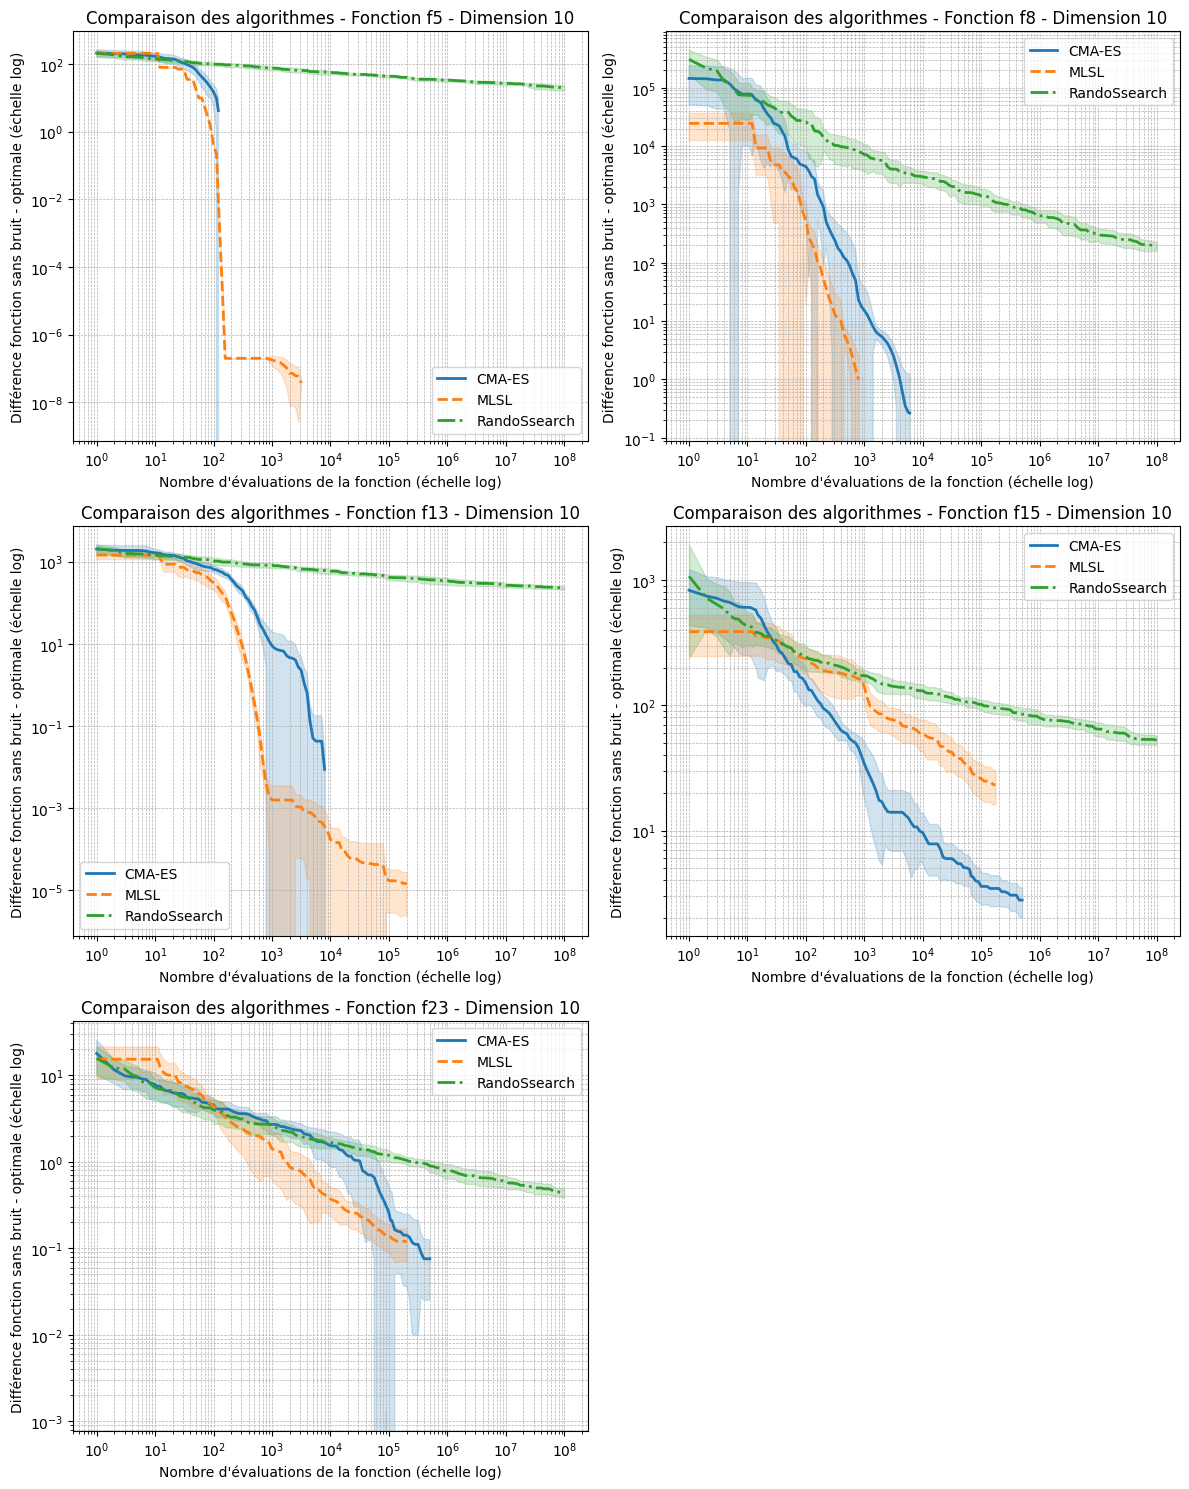

Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\CMAES_posik_noiseless\CMAES\data\data_f8\bbobexp_f8_DIM10.tdat
Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\MLSL_pal_noiseless\MLSL\data\data_f8\bbobexp_f8_DIM10.tdat
Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\RANDOMSEARCH-5-1e7D_Brockhoff\RANDOMSEARCH-5-1e7D-Brockhoff\data\data_f8\bbobexp_f8_DIM10.tdat
Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\CMAES_posik_noiseless\CMAES\data\data_f8\bbobexp_f8_DIM10.tdat
Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\MLSL_pal_noiseless\MLSL\data\data_f8\bbobexp_f8_DIM10.tdat
Fichier non trouvé: C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\RANDOMSEARCH-5-1e7D_Brockhoff\RANDOMSEARCH-5-1e7D-Brockhoff\data\data_f8\

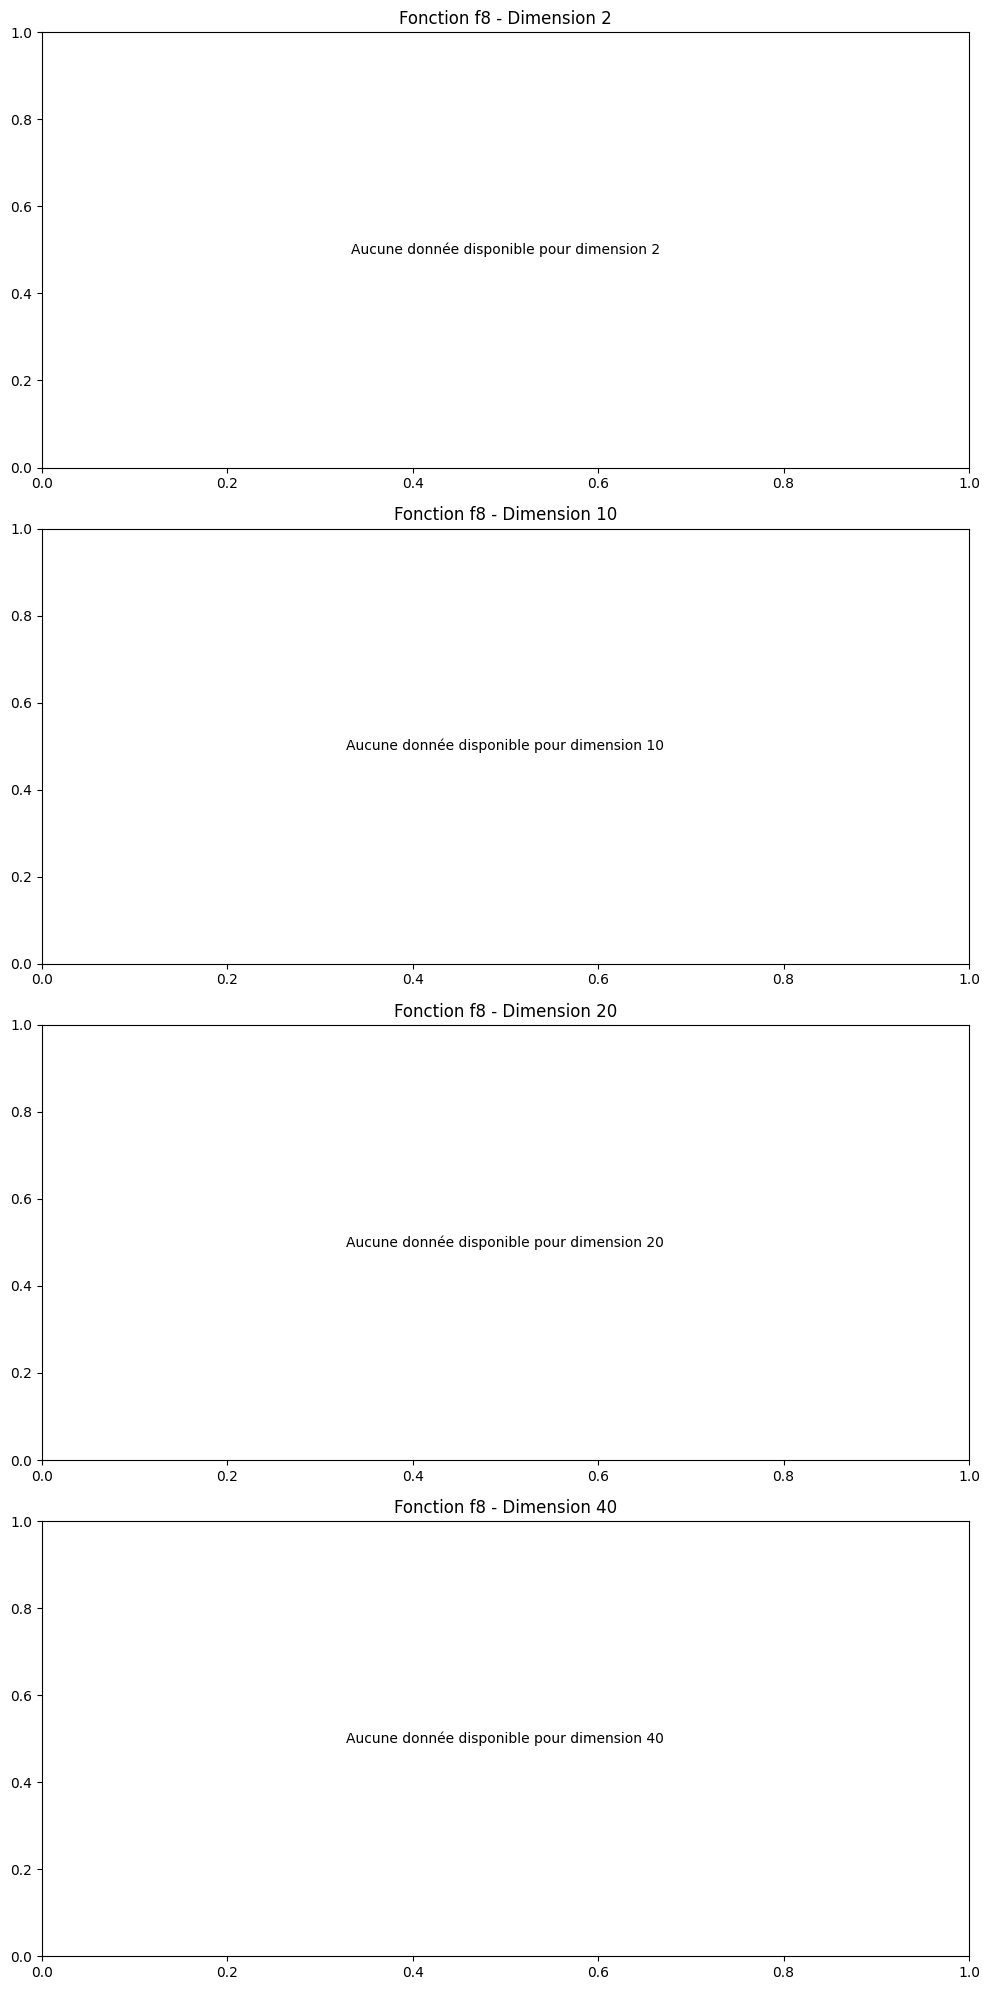

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def lire_donnees_algo(fichier):
    """Lit les données d'un fichier et retourne les runs (x, y)"""
    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  
    x_vals_all, y_vals_all = [], []  
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x_vals_all and y_vals_all:
                runs.append((x_vals_all, y_vals_all))  
            debut = True  
            x_vals_all, y_vals_all = [], []  

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x_vals_all.append(int(valeurs[0]))  
            y_vals_all.append(float(valeurs[2]))  

    if x_vals_all and y_vals_all:
        runs.append((x_vals_all, y_vals_all))

    # Vérifier qu'il y a des runs
    if not runs:
        raise ValueError(f"Aucune donnée trouvée dans le fichier {fichier}")

    # Trouver la longueur minimale des runs pour aligner les données
    min_len = min(len(run[0]) for run in runs)
    x_common = runs[0][0][:min_len]   

    y_matrix = np.array([run[1][:min_len] for run in runs])   

    # Calcul des statistiques descriptives
    y_mean = np.mean(y_matrix, axis=0)   
    y_std = np.std(y_matrix, axis=0)   
    
    return x_common, y_mean, y_std

def comparer_algos_par_fonction(fichiers_par_algo, noms_algos, nom_fonction, dimension=None, ax=None):
    """
    Compare plusieurs algorithmes sur une même fonction
    
    Args:
        fichiers_par_algo: Liste de fichiers, un par algorithme
        noms_algos: Liste des noms des algorithmes
        nom_fonction: Nom de la fonction (f5, f8, etc.)
        dimension: Dimension du problème (optionnel)
        ax: Axes matplotlib (optionnel)
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Couleurs pour chaque algorithme
    couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Styles de ligne pour chaque algorithme
    styles = ['-', '--', '-.', ':', '-']
    
    for i, (fichier, nom_algo) in enumerate(zip(fichiers_par_algo, noms_algos)):
        if not os.path.exists(fichier):
            print(f"Fichier non trouvé: {fichier}")
            continue
            
        try:
            x_common, y_mean, y_std = lire_donnees_algo(fichier)
            ax.plot(x_common, y_mean, color=couleurs[i % len(couleurs)], 
                   linestyle=styles[i % len(styles)], linewidth=2, label=nom_algo)
            ax.fill_between(x_common, y_mean - y_std, y_mean + y_std, 
                           color=couleurs[i % len(couleurs)], alpha=0.2)
        except Exception as e:
            print(f"Erreur lors du traitement du fichier {fichier}: {e}")
    
    ax.set_xscale("log")   
    ax.set_yscale("log") 
    ax.set_xlabel("Nombre d'évaluations de la fonction (échelle log)")
    ax.set_ylabel("Différence fonction sans bruit - optimale (échelle log)")
    
    titre = f"Comparaison des algorithmes - Fonction {nom_fonction}"
    if dimension:
        titre += f" - Dimension {dimension}"
    ax.set_title(titre)
    
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    return ax

def generer_comparaisons_fonctions(dossiers_algos, noms_algos, fonctions, dimension):
    """
    Génère un graphe pour chaque fonction, comparant tous les algorithmes
    
    Args:
        dossiers_algos: Liste des dossiers principaux pour chaque algorithme
        noms_algos: Liste des noms des algorithmes
        fonctions: Liste des fonctions à comparer (f5, f8, etc.)
        dimension: Dimension du problème
    """
    # Déterminer la taille de la grille automatiquement
    n = len(fonctions)
    rows = int(np.ceil(n ** 0.5))   
    cols = int(np.ceil(n / rows)) 
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
    
    axes_flat = np.array(axes).flatten() if isinstance(axes, np.ndarray) else [axes]
    
    for i, fonction in enumerate(fonctions):
        # Construire les chemins des fichiers pour chaque algorithme
        fichiers_par_algo = []
        for dossier in dossiers_algos:
            fichier = os.path.join(dossier, f"data_{fonction}", f"bbobexp_{fonction}_DIM{dimension}.tdat")
            fichiers_par_algo.append(fichier)
        
        # Filtrer les fichiers qui n'existent pas
        fichiers_valides = []
        noms_valides = []
        for j, fichier in enumerate(fichiers_par_algo):
            if os.path.exists(fichier):
                fichiers_valides.append(fichier)
                noms_valides.append(noms_algos[j])
            else:
                print(f"Fichier non trouvé: {fichier}")
        
        if fichiers_valides:
            comparer_algos_par_fonction(fichiers_valides, noms_valides, fonction, dimension, axes_flat[i])
        else:
            axes_flat[i].text(0.5, 0.5, f"Aucune donnée disponible pour {fonction}", 
                             horizontalalignment='center', verticalalignment='center')
            axes_flat[i].set_title(f"Fonction {fonction}")
    
    # Supprimer les axes vides si le nombre de fonctions < nb total de cases
    for j in range(len(fonctions), len(axes_flat)):
        if len(axes_flat) > 1: 
            fig.delaxes(axes_flat[j])
    
    plt.tight_layout()
    plt.show()

 
if __name__ == "__main__":

    # Définir les dossiers principaux pour chaque algorithme
    dossiers_algos = [
        r"C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\CMAES_posik_noiseless\CMAES",   
        r"C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\MLSL_pal_noiseless\MLSL",    
        r"C:\Users\User\Desktop\s8\comparaison_algo\Projet-presentation-de-la-recherche\RANDOMSEARCH-5-1e7D_Brockhoff\RANDOMSEARCH-5-1e7D-Brockhoff"
    ]
    
    # Noms des algorithmes
    noms_algos = ["CMA-ES", "MLSL", "RandoSsearch"]
    
    # Fonctions à comparer
    fonctions = ["f5", "f8", "f13", "f15", "f23"]
    
    # Dimension à utiliser
    dimension = 10   

    # Générer les comparaisons
    generer_comparaisons_fonctions(dossiers_algos, noms_algos, fonctions, dimension)
    
    # Fonction pour comparer toutes les dimensions pour une fonction spécifique
    def comparer_dimensions_pour_fonction(dossiers_algos, noms_algos, fonction, dimensions):
        """Compare les algorithmes pour une fonction spécifique à travers différentes dimensions"""
        fig, axes = plt.subplots(len(dimensions), 1, figsize=(10, 5 * len(dimensions)))
        
        axes_list = axes if isinstance(axes, np.ndarray) else [axes]
        
        for i, dim in enumerate(dimensions):
            fichiers_par_algo = []
            for dossier in dossiers_algos:
                fichier = os.path.join(dossier, "data", f"data_{fonction}", f"bbobexp_{fonction}_DIM{dimension}.tdat")
                fichiers_par_algo.append(fichier)
            
            # Filtrer les fichiers qui n'existent pas
            fichiers_valides = []
            noms_valides = []
            for j, fichier in enumerate(fichiers_par_algo):
                if os.path.exists(fichier):
                    fichiers_valides.append(fichier)
                    noms_valides.append(noms_algos[j])
                else:
                    print(f"Fichier non trouvé: {fichier}")
            
            if fichiers_valides:
                comparer_algos_par_fonction(fichiers_valides, noms_valides, fonction, dim, axes_list[i])
            else:
                axes_list[i].text(0.5, 0.5, f"Aucune donnée disponible pour dimension {dim}", 
                                 horizontalalignment='center', verticalalignment='center')
                axes_list[i].set_title(f"Fonction {fonction} - Dimension {dim}")
        
        plt.tight_layout()
        plt.show()
    
    dimensions = [2, 10, 20, 40]
    fonction_specifique = "f8"
    comparer_dimensions_pour_fonction(dossiers_algos, noms_algos, fonction_specifique, dimensions)